In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.tree import export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load the Dataset

In [2]:
bank=pd.read_csv("D:\\Prodigy Info-tech\\Task - 3\\bank.csv")
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [3]:
bank.shape

(11162, 17)

In [4]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

### Data Preprocessing & Exploration

In [14]:
bank = bank.drop('duration', axis=1)

In [20]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,2,-1,0,unknown,yes


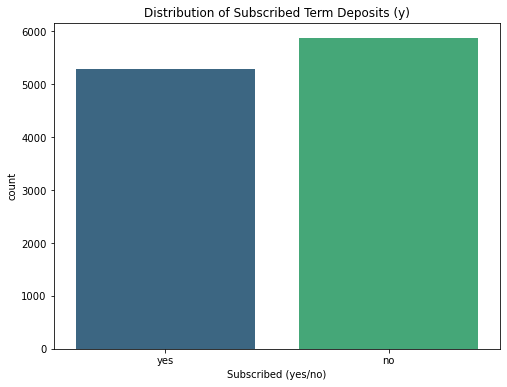

In [19]:
plt.figure(figsize=(8,6))
sns.countplot(x='deposit', data=bank, palette='viridis')
plt.title('Distribution of Subscribed Term Deposits (y)')
plt.xlabel('Subscribed (yes/no)')
plt.show()

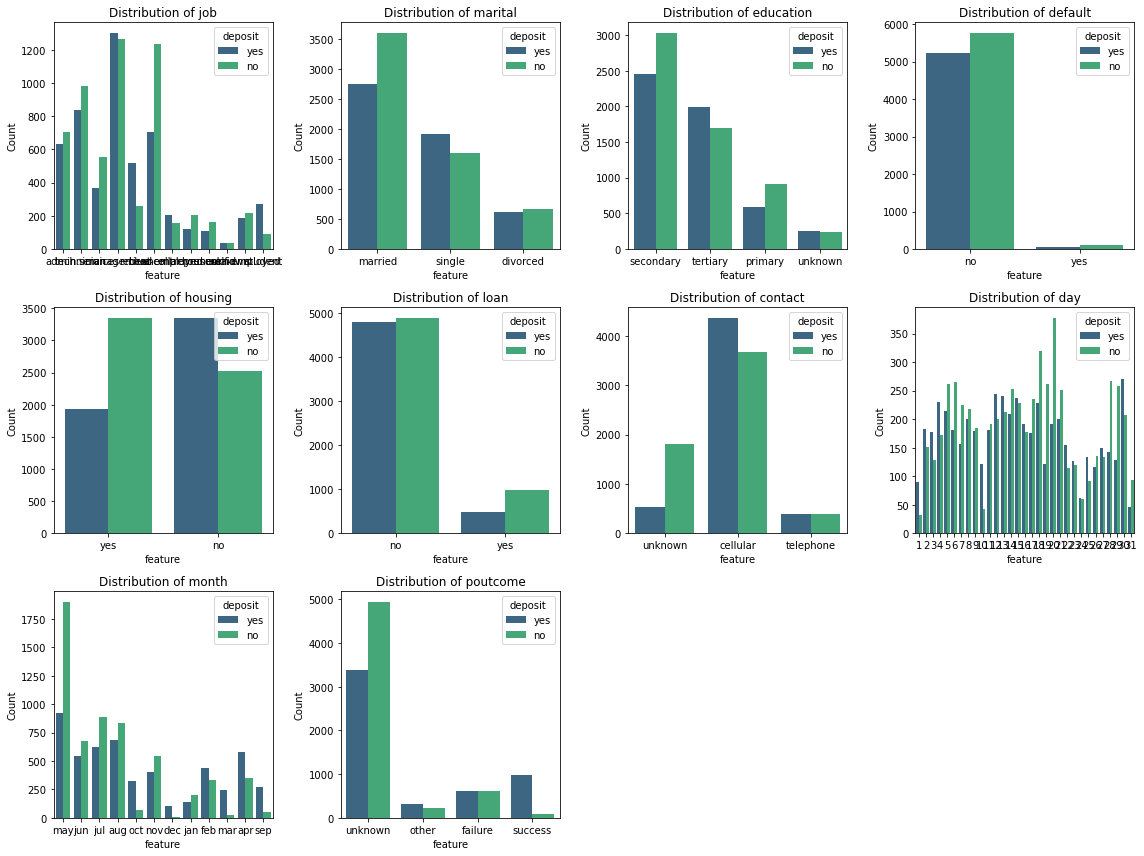

In [31]:
# Daistribution od categorical features
categorical_features = ['job','marital','education','default','housing','loan','contact','day','month','poutcome']
plt.figure(figsize=(16,12))
for i, feature in enumerate (categorical_features, 1):
    plt.subplot(3, 4, i)
    sns.countplot(x=feature, data=bank, hue='deposit', palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('feature')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

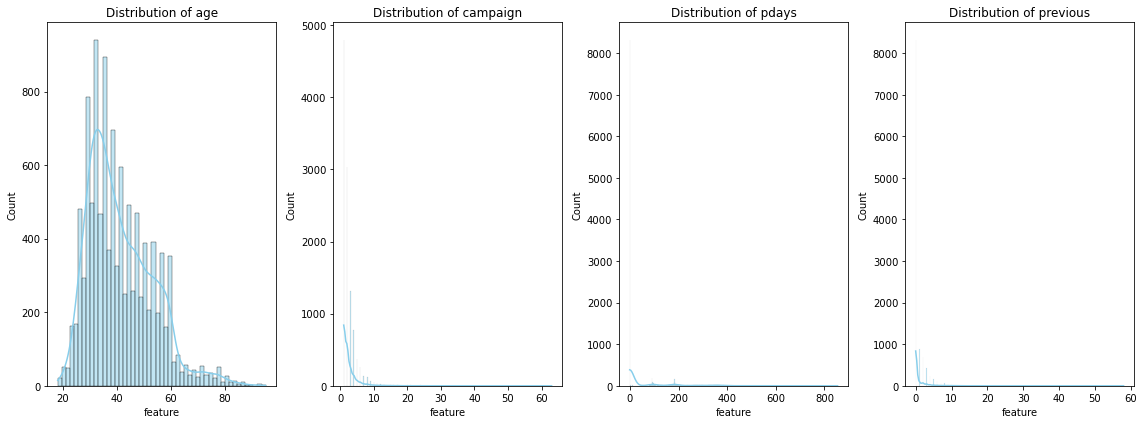

In [33]:
# Distribution of numeric features
numeric_features = ['age','campaign','pdays','previous']
plt.figure(figsize=(16,6))
for i, feature in enumerate(numeric_features, 1):
    plt.subplot(1, 4, i)
    sns.histplot(bank[feature], kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel('feature')
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

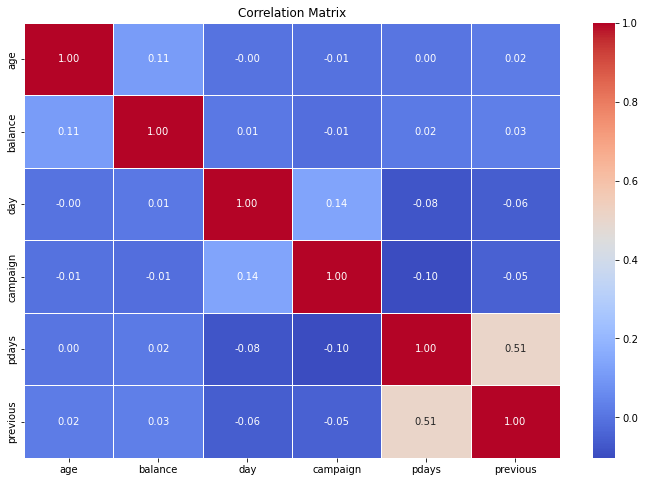

In [36]:
#correlation matrix
corr_matrix = bank.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [37]:
#preprocess the data 
le = preprocessing.LabelEncoder()
for col in bank.columns:
    if bank[col].dtype == 'object':
        bank[col] = le.fit_transform(bank[col])

In [38]:
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,2,172,5,0,0


### Data Preprocessing & Exploration

In [40]:
x = bank.drop('deposit', axis=1)
y = bank['deposit']

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Using DecisionTreeClassifier 

In [42]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
# prediction
y_pred = model.predict(X_test)

In [45]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [46]:
print("\Decision Tree Classifier Results:")
print(f"\Accuracy on Testing Data: {accuracy:4f}")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

\Decision Tree Classifier Results:
\Accuracy on Testing Data: 0.781908
[[936 230]
 [257 810]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1166
           1       0.78      0.76      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233

